## Problem set 8

**Problem 0** (-2 points for every missing green OK sign. If you don't run the cell below, that's -14 points.)

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.7":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.7":
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.18.5", 'matplotlib': "3.2.2",'sklearn': "0.23.1", 
                'pandas': "1.0.5",'xgboost': "1.1.1", 'shap': "0.35.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 01:53:57) [MSC v.1916 64 bit (AMD64)]

[ OK ] numpy version 1.18.5 is installed.
[ OK ] matplotlib version 3.2.2 is installed.
[ OK ] sklearn version 0.23.1 is installed.
[ OK ] pandas version 1.0.5 is installed.
[ OK ] xgboost version 1.1.1 is installed.
[ OK ] shap version 0.35.0 is installed.


**Problem 1**

One ML algorithm we didn't cover during class is the nearest neighbor algorithm. The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these nearest neighbors. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (distance-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.

Read more about this method [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) and [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression).

**Problem 1a** (8 points)

Nearest neighbor regression. Please import KNeighborsRegressor and read the manual. Let's study how the `n_neighbors` parameter impact the prediction.

Please recreate the simple regression dataset from the week 7 module. (0 points)

Prepare a plot that shows predictions for n_neighbors = 1, 3, 10, and 30. (2 points)

Answer the following questions and explain your answer. (4 points)
   - What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting manifest in nearest neighbor?
   - How does the model behave with respect to outliers?
   - Explain why the model prediction is a step function and how this step function differs from a decision tree step function?

Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point. (2 points)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

import numpy as np
from sklearn.svm import SVR
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)


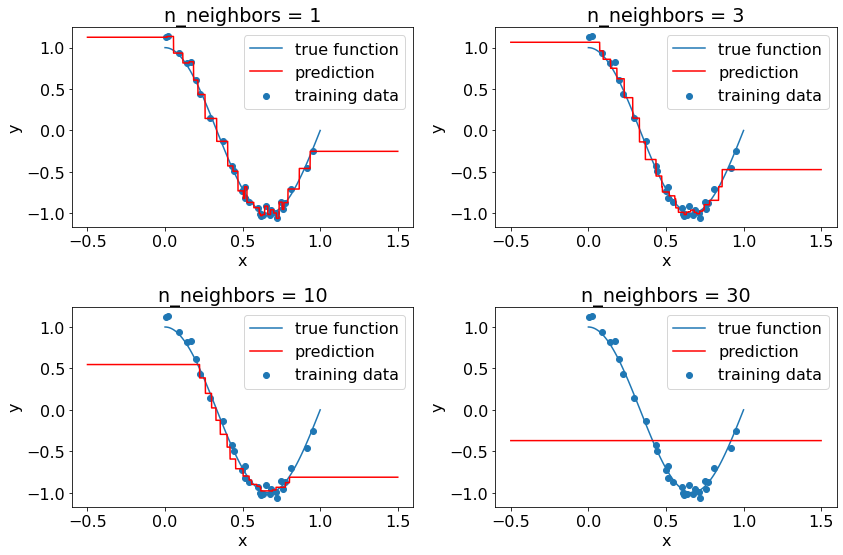

In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=1,weights='uniform')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 1')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=3,weights='uniform')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 3')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=10,weights='uniform')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 10')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=30,weights='uniform')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 30')
plt.legend()

plt.tight_layout()
plt.savefig('figures/kneighbors_uni_reg.png',dpi=300)
plt.show()


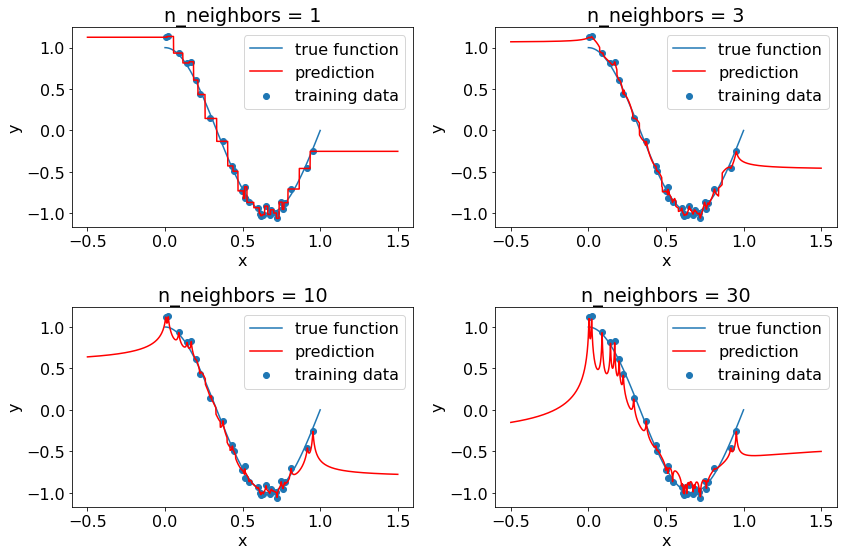

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=1,weights='distance')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 1')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=3,weights='distance')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 3')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=10,weights='distance')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 10')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = KNeighborsRegressor(n_neighbors=30,weights='distance')
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('n_neighbors = 30')
plt.legend()

plt.tight_layout()
plt.savefig('figures/kneighbors_dist_reg.png',dpi=300)
plt.show()


**Problem 1b** (5 points)

Nearest neighbor classification. Please import KNeighborsClassifier and read the manual. Let's study how the `n_neighbors` parameters impact the prediction.

Please recreate the simple classification dataset from the week 7 module. (0 points)

Prepare a plot that shows predictions for n_neighbors = 1, 10, 30, and 100. (2 points)

Prepare another plot with the same n_neighbors values but `weights` set to distance. (1 point)

What is the biggest difference between the predicted probabilities of the two models? Explain your answer. (2 points)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import numpy as np

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

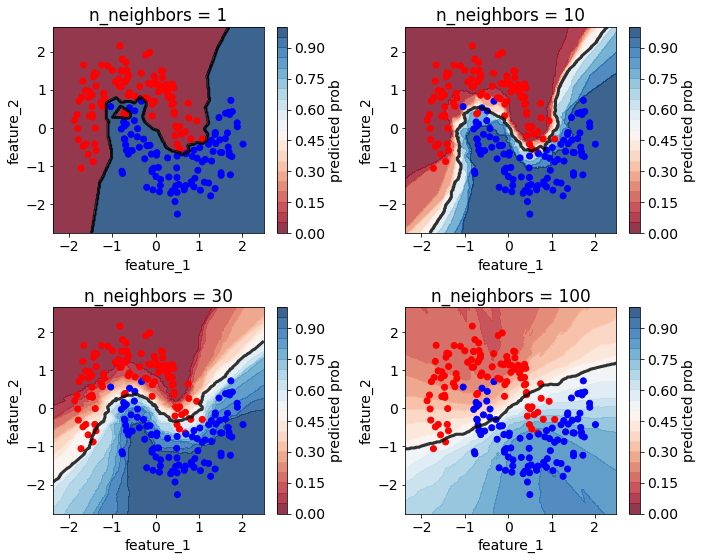

In [8]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = KNeighborsClassifier(n_neighbors = 1)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 1')

plt.subplot(2,2,2)
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 10')

plt.subplot(2,2,3)
clf = KNeighborsClassifier(n_neighbors = 30)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 30')

plt.subplot(2,2,4)
clf = KNeighborsClassifier(n_neighbors = 100)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 100')


plt.tight_layout()

plt.savefig('figures/kneighbors_uni_clf.png',dpi=300)
plt.show()




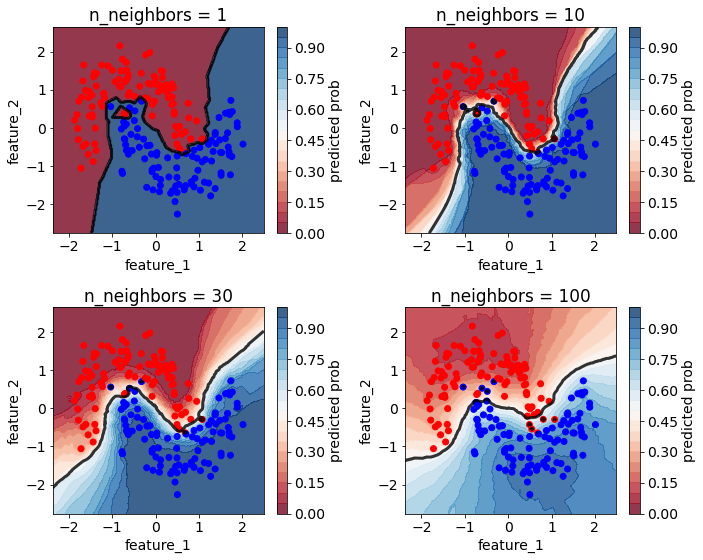

In [9]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = KNeighborsClassifier(n_neighbors = 1,weights='distance')
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 1')

plt.subplot(2,2,2)
clf = KNeighborsClassifier(n_neighbors = 10,weights='distance')
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 10')

plt.subplot(2,2,3)
clf = KNeighborsClassifier(n_neighbors = 30,weights='distance')
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 30')

plt.subplot(2,2,4)
clf = KNeighborsClassifier(n_neighbors = 100,weights='distance')
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('n_neighbors = 100')


plt.tight_layout()

plt.savefig('figures/kneighbors_dist_clf.png',dpi=300)
plt.show()




**Problem 2**

You will work with the diabetes dataset and try different ML algorithms on it to figure out which one is the best. Whenever you work with a new dataset, you want to try as many algorithms on it as possible because you can't know in advance which algorithm (and hyperparameters) will be the best.

Generally you need to decide five things when you build an ML pipeline:
- your splitting strategy
- how you preprocess the data
- what evaluation metric you'll use
- what ML algorithms you will try
- what paramater grid you should use for each ML algorithm

You'll write a function in problem 2a that takes a preprocessor, an ML algorithm, and its corresponding parameter grid as inputs and it will calculate test scores and return the best models. The splitting strategy and the evaluation metric are not inputs to this function.

**Problem 2a** (10 points)

Write a function which takes the unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer), an initialized ML algorithm, and a correspondig parameter grid as inputs. Inside the function, split the data to other and test (80-20) and then use KFold with 4 folds. Then preprocess the data and perform cross validation (I recommend you use GridSearchCV), then calculate the test score. Use RMSE as your evaluation metric. Repeat this 10 times for 10 different random states, and the function should return the 10 best models and the 10 test scores. The skeleton of the function is provided for convenince.

The function name contains the splitting strategy and the evaluation metric. It would be difficult (but not impossible) to write a general `MLpipe` function that takes a splitter and an evaluation metric also as inputs for two reasons:
- some splitters are difficult to pass as a function argument (e.g., two train_test_split steps, or a train_test_split combined with a KFold),
- some evaluation metrics need to be maximized (like accuracy, R2, f_beta), while others need to be minimized (like logloss, RMSE) and the code for these two options differ.

For now, I recommend that if you need to try multiple ML algorithms, write a function that's specific to a splitting strategy and an evaluation metric and add a description to the function as shown in MLpipe_KFold_RMSE. Such functions make it very easy to try many ML algorithms on your dataset and I recommend you write a similar function for your project.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')
df.head()

y = df['Y']
X = df.loc[:, df.columns != 'Y']

def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.
    '''
    
    test_scores = []
    best_models = []
    
    # loop through 10 random states (2 points)
    for state in range(10):
        # split data to other/test 80/20, and the use KFold with 4 folds (2 points)
        X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state=42+state)
        kf = KFold(n_splits=4, shuffle=True, random_state=42+state)
        # preprocess the data (1 point)
        pipe = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', ML_algo)])
        # loop through the hyperparameter combinations or use GridSearchCV (2 points)
        grid = GridSearchCV(pipe, param_grid=param_grid, 
                            scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
                            cv=kf, return_train_score=True, n_jobs=-1)
        # for each combination, calculate the train and validation scores using the evaluation metric
        grid.fit(X_other, y_other)
        # find which hyperparameter combination gives the best validation score (1 point)
        best_param = grid.best_params_
        # calculate the test score (1 point)
        test_score = mean_squared_error(y_test, grid.predict(X_test), squared=False)
        # append the test score and the best model to the lists (1 point)
        test_scores.append(test_score)
        best_models.append(grid.best_estimator_)
    return best_models, test_scores

cat_ftrs = ['SEX']
num_ftrs = ['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(remainder='passthrough', 
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])

**Lasso**

In [26]:
# define model
ML_algo = Lasso()
param_grid = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)

[53.70686871316283, 53.71499936562122, 51.1462752656116, 48.51353971073299, 59.44210439589617, 55.2367490335775, 52.32163102788211, 46.34483749480247, 50.954230360355126, 54.357022402395046]


**Problem 2b** (17 points)

Then train following models on the diabetes dataset:
- linear regression with l1 regularization (already completed in 2a)
- linear regression with l2 regularization (2 points)
- linear regression with an elastic net (3 points)
- RF (4 points)
- SVR (3 points)
- k nearest neighbor regression (3 points)

Please determine what the parameter grid should be for each of these methods. Please follow the guidance from the previous exercises and the lecture notes.

Make sure your code is reproducable! When you rerun it, you should get back the exact same test scores and best hyperparameters in each run. So fix your random states whereever necessary.

Which algorithm is the best on the diabetes dataset based on the mean and standard deviation of the test scores? Write a paragraph or two and describe your findings. (2 points)

**Lasso**

In [27]:
# define model
ML_algo = Lasso()
param_grid = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)
print(f"mean: {np.mean(scores)}, std: {np.std(scores)}")

[53.70686871316283, 53.71499936562122, 51.1462752656116, 48.51353971073299, 59.44210439589617, 55.2367490335775, 52.32163102788211, 46.34483749480247, 50.954230360355126, 54.357022402395046]
mean: 52.573825777003705, std: 3.4646944316046717


**Ridge**

In [28]:
# define model
ML_algo = Ridge()
param_grid = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)
print(f"mean: {np.mean(scores)}, std: {np.std(scores)}")

[53.77675849543452, 53.462079756880065, 51.15607144808619, 48.60710003414142, 59.521943715222456, 54.96350400238193, 52.30683771902393, 45.83887034103306, 50.99113177972784, 54.197850898539436]
mean: 52.48221481904708, std: 3.5278498717230242


**ElasticNet**

In [29]:
# define model
ML_algo = ElasticNet()
param_grid = {'regressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2], 
              'regressor__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9], 
              'regressor__max_iter': [100000]}

models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)
print(f"mean: {np.mean(scores)}, std: {np.std(scores)}")

[53.739154951746094, 53.5823303926305, 51.470428164905066, 48.558341569492455, 59.552849986737826, 55.07154950875227, 52.279884657848164, 45.84261640031484, 51.032270884030545, 54.19740661999502]
mean: 52.53268331364528, std: 3.536285288121123


**RF**

In [15]:
### define model
ML_algo = RandomForestRegressor()
param_grid = {'regressor__max_features': [3, 5, 7, None], 
              'regressor__max_depth': [1, 3, 5, 10, 20, None]}

models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)
print(f"mean: {np.mean(scores)}, std: {np.std(scores)}")

[53.39978374950953, 56.293061151837385, 54.80212896746117, 52.148305008174546, 60.274774661595, 58.69997473732485, 53.13271345934865, 48.31942111978703, 54.10043550712936, 53.112624541566305]
mean: 54.42832229037337, std: 3.2114983856578423


**SVR**

In [39]:
# define model
ML_algo = SVR()
param_grid = {'regressor__C': np.logspace(-1, 1, 5), 
              'regressor__gamma': list(np.logspace(-1, 2, 5)) + ['scale']}

models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)
print(f"mean: {np.mean(scores)}, std: {np.std(scores)}")

[52.36983042202063, 53.82101360816441, 54.08656588061254, 51.49126757566903, 59.768052748742704, 55.50675077356799, 54.47438380950699, 48.24488039799459, 51.81287804175199, 53.52203013772533]
mean: 53.50976533957562, std: 2.837015165181924


**KNN**

In [13]:
# define model
ML_algo = KNeighborsRegressor()
param_grid = {'regressor__n_neighbors': [1, 2, 3, 5, 10, 30, 100], 
              'regressor__weights': ['uniform', 'distance']}

models, scores = MLpipe_KFold_RMSE(X,y,preprocessor,ML_algo,param_grid)
print(scores)
print(f"mean: {np.mean(scores)}, std: {np.std(scores)}")

[54.33080131250204, 55.5365384409037, 57.06480479321249, 52.041828641410405, 64.49070632644063, 57.06354607616322, 55.46470616293502, 48.75050048632187, 55.23980349031767, 54.9505253998696]
mean: 55.49337611300766, std: 3.8076183571420645


In [4]:
param_grid = {'regressor__C': np.logspace(-1, 1, 5), 
              'regressor__gamma': list(np.logspace(-1, 2, 5)) + ['scale']}
print(param_grid)

{'regressor__C': array([ 0.1       ,  0.31622777,  1.        ,  3.16227766, 10.        ]), 'regressor__gamma': [0.1, 0.5623413251903491, 3.1622776601683795, 17.78279410038923, 100.0, 'scale']}


Linear models performed similarly, all three did well. SVR has the lowest standard deviation, KNN and RandomForest did the worst. 